### Draw the topography

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

#data = np.genfromtxt('../data/Paleotopography_bathymetry/Golonka_rev210/000Ma_Golonka.xyz')
#data = np.genfromtxt('../data/Golonka_Smoothed/10Ma_Golonka.xyz')
data = np.genfromtxt('../data/Golonka_Smoothed/simon_7.xyz')
x = data[:,0]
y = data[:,1]
z = data[:,2]

plt.figure(figsize=(15, 8))

m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='kav7', lon_0=0)    
xi, yi = m(x, y)
cs = m.scatter(xi, yi, marker='.', c=z, alpha=0.5, lw=0,)

m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
#m.drawcoastlines()   

cbar = m.colorbar(cs, location='bottom', pad="10%")
plt.title("topography")
plt.show()
plt.close()

### Draw temperature input
lons:0-360 [1] 
Lats:(90)-(-90) [0] 

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

for time in range(0,150,10):
    if time == 0:
        data = np.genfromtxt('../data/SurfaceTemperature_NASA.xyz')
    else:
        data = np.genfromtxt('./output/{}Ma_SurfaceTemperature.xyz'.format(time))
    #print data
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]

    plt.figure(figsize=(15, 8))

    m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='kav7', lon_0=0)    
    xi, yi = m(x, y)
    cs = m.scatter(xi, yi, marker='.', cmap='RdBu_r', c=z, alpha=0.5, lw=0, vmin=-35,vmax=35)

    m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
    #m.drawcoastlines()   

    cbar = m.colorbar(cs, location='bottom', pad="10%")
    plt.title("{}Ma Temperature".format(time))
    plt.show()

### Draw output 
Lons: 0-360 [1]
Lats: 0-180 [0]

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

#time=40
for time in range(0,150,10):
    data = np.genfromtxt('./output/[{}Ma_Golonka.xyz]_PlotData_Atm.xyz'.format(time),skip_header=1)
    for d in data:
        d[1]=90-d[1]
    x = data[:,0]
    y = data[:,1]
    z = data[:,6]

    topo = data[:,2]

    plt.figure(figsize=(15, 8))

    m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='kav7', lon_0=0)  

    xx = x
    x, topo = m.shiftdata(xx, datain = topo, lon_0=0)
    x, z = m.shiftdata(xx, datain = z, lon_0=0)

    xi, yi = m(x, y)
    cs = m.scatter(xi, yi, marker='.', c=z, alpha=0.5, lw=0)

    m.contour( xi.reshape((361,181)), yi.reshape((361,181)), topo.reshape((361,181)),
                            colors ='k', linewidths= 0.3 )

    m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
    #m.drawcoastlines()   

    cbar = m.colorbar(cs, location='bottom', pad="10%")
    plt.title("{}Ma Temperature".format(time))
    plt.savefig('{}Ma_temperature.png'.format(time), bbox_inches='tight')
    print '{}Ma_temperature.png has been saved!'.format(time)
    plt.show()
    plt.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

adata = np.loadtxt('./output/[100Ma_Golonka.xyz]_PlotData_Atm.xyz', skiprows=1)
data = adata[:,6]
data = data[~np.isnan(data)]
if data:
    print np.nanmin(data), np.nanmax(data)
    # the histogram of the data
    n, bins, patches = plt.hist(data, 50, normed=1, facecolor='g', alpha=0.75)

    plt.grid(True)
    plt.show()
else:
    print "NO valid data found."

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

#time=40
for time in range(10,150,10):
    data = np.genfromtxt('./output/{}Ma_SurfaceTemperature.xyz'.format(time))
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]

    plt.figure(figsize=(15, 8))

    m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='kav7', lon_0=0)  

    xi, yi = m(x, y)
    cs = m.scatter(xi, yi, marker='.', c=z, alpha=0.5, lw=0)


    m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
    #m.drawcoastlines()   

    cbar = m.colorbar(cs, location='bottom', pad="10%")
    plt.title("{}Ma Temperature_i".format(time))
    plt.savefig('{}Ma_temperature_i.png'.format(time), bbox_inches='tight')
    print '{}Ma_temperature.png has been saved!'.format(time)
    plt.show()
    plt.close()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib

time=0
data_a = np.genfromtxt('./output/[{}Ma_Golonka.xyz]_PlotData_Atm.xyz'.format(time),skip_header=1)
for d in data_a:
    d[1]=90-d[1]
x_a = data_a[:,0]
y_a = data_a[:,1]
z_a = data_a[:,6]
    
   
data_b = np.genfromtxt('../data/SurfaceTemperature_NASA.xyz')

x_b = data_b[:,0]
y_b = data_b[:,1]
z_b = data_b[:,2]

z = z_a - z_b
print np.min(z_a)
print np.max(z_a)
print np.min(z_b)
print np.max(z_b)
print z_a
print z_b
print z

lat_r=(np.absolute(y_a))/90.0*np.pi/2
lat_c= np.cos(np.absolute(lat_r))
count=0
for n,l in zip(z_a,lat_c):
    count+=n*l
print count/np.sum(lat_c)

lat_r=(np.absolute(y_b))/90.0*np.pi/2
lat_c= np.cos(np.absolute(lat_r))
count=0
for n,l in zip(z_b,lat_c):
    count+=n*l
print count/np.sum(lat_c)

plt.figure(figsize=(15, 8))

m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='kav7', lon_0=0)    
xi, yi = m(x_a, y_a)

cs = m.scatter(xi, yi, c=z, marker='.',cmap='RdBu_r', alpha=0.5, lw=0,vmin=-4,vmax=4)

m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
#m.drawcoastlines()   

cbar = m.colorbar(cs, location='bottom', pad="10%")
plt.title("{}Ma Temperature Difference".format(time))
plt.show()

n, bins, patches = plt.hist(z, 50, normed=1, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()
    


In [ ]:
import numpy as np
#data = np.genfromtxt('./output/[0Ma_Golonka.xyz]_PlotData_Atm.xyz',skip_header=1)
data = np.genfromtxt('./output/10Ma_SurfaceTemperature.xyz')
print np.max(data[:,2])

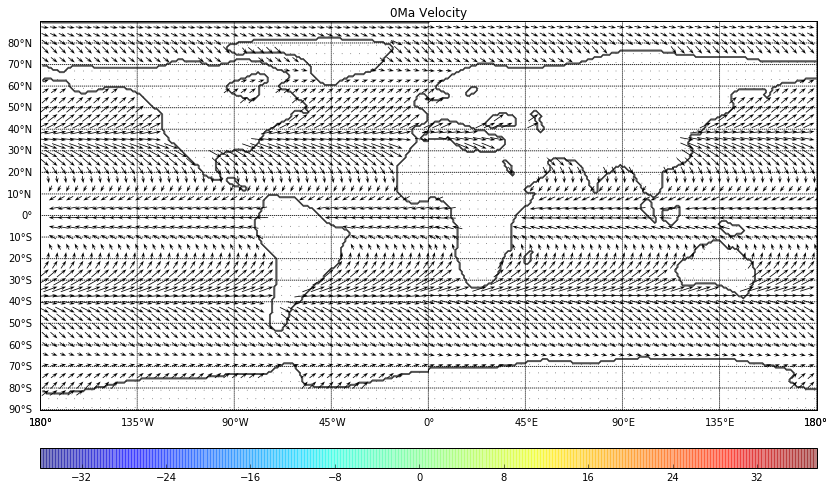

In [132]:
# draw quiver
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

end_time=10

def down_sample(a):
    aa = a.reshape((361,181))
    tmp=[]
    for t in aa:
        tmp.append(t[3::4])
        #print t
    #print tmp
    return tmp[3::4]

def fix_wrong_lats(a):
    aa = a.reshape((361,181))
    tmp = []
    for r in aa:
        r0=np.fliplr(r[0:90].reshape((1,90)))
        #print r0
        r1=np.fliplr(r[90:181].reshape((1,91)))
        print r0[0]
        tmp.append(np.concatenate((r1[0],r0[0])))
    return np.array(tmp)

for time in range(0,end_time,10):
    data = np.genfromtxt('./output/[{}Ma.xyz]_PlotData_Atm.xyz'.format(time),skip_header=1)
    for d in data:
        d[1]=90-d[1]
    x = data[:,0]
    y = data[:,1]
    z = data[:,6]

    #vx=np.sin(data[:,3])*np.cos(data[:,4])
    #vy=np.sin(data[:,3])*np.sin(data[:,4])
    vx=-data[:,3]
    vy=data[:,4]
    topo = data[:,2]

    plt.figure(figsize=(15, 8))

    m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='cyl', lon_0=0)  

    xx = x
    x, topo = m.shiftdata(xx, datain = topo, lon_0=0)
    x, z = m.shiftdata(xx, datain = z, lon_0=0)
    x, vx = m.shiftdata(xx, datain = vx, lon_0=0)
    x, vy = m.shiftdata(xx, datain = vy, lon_0=0)

    xi, yi = m(x, y)
    #cs = m.scatter(xi, yi, marker='.', c=z, alpha=0.5, lw=0)

    #m.quiver(xi[::39],yi[::39],vx[::39],vy[::39])
    #vx = fix_wrong_lats(vx)
    #vy = fix_wrong_lats(vy)
    m.quiver(down_sample(xi),down_sample(yi),down_sample(vy),down_sample(vx),width=0.001,
             headlength=7,headwidth=5,pivot='tip')
    #m.scatter(down_sample(xi),down_sample(yi),marker='.',color='r')
    
    m.contour( xi.reshape((361,181)), yi.reshape((361,181)), topo.reshape((361,181)),
                            colors ='k', linewidths= 0.3 )

    m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)
    #m.drawcoastlines()   

    cbar = m.colorbar(cs, location='bottom', pad="10%")
    plt.title("{}Ma Velocity".format(time))
    #plt.savefig('{}Ma_temperature.png'.format(time), bbox_inches='tight')
    #print '{}Ma_temperature.png has been saved!'.format(time)
    plt.show()
    plt.close()